In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [6]:
def ForwardDiffusion(x_0, steps, delta):
    current = x_0
    places = []
    for i in tqdm(range(steps)):
        F = - 2 *current 
        x_n = current + F * delta / 2 + np.sqrt(delta) * np.random.normal(0, 1)
        places.append(x_n)
        current = x_n
    return places

In [7]:
def P(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

  0%|          | 0/100000 [00:00<?, ?it/s]

100%|██████████| 100000/100000 [00:00<00:00, 677812.54it/s]


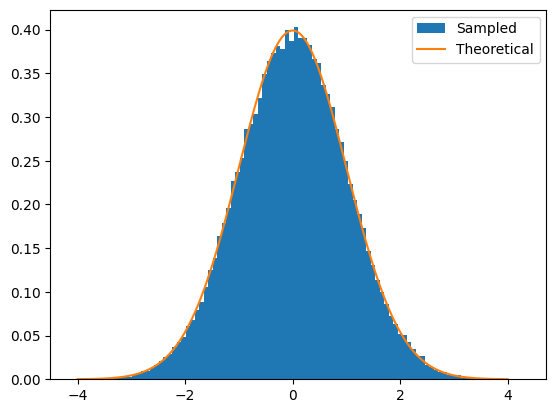

In [8]:
places = ForwardDiffusion(0, 100000, 1)
plt.hist(places[1000:], label="Sampled", density=True, bins=100)
# plt.hist()
# plt.hist(np.linspace(0, 9000, 9000), places[1000:])
x = np.linspace(-4, 4, 500)
plt.plot(x, P(x), label= "Theoretical")
# plt.hist(np.random.normal(0, 1, 9000), alpha=0.3, label="Uniform", density=True, bins=100)
plt.legend()


In [9]:
def ForwardDiffusionv2(x_0, steps, delta):
    places = []
    current = x_0
    for i in tqdm(range(steps)):
        x_n = current + np.sqrt(delta) * np.random.normal(0, np.sqrt(delta))
        # A = np.exp(-(x_n**2/2 - current**2/2) + 1)
        if np.exp((current**2 - x_n**2)/2) > np.random.uniform():
            places.append(x_n)
            current = x_n
        # cutoff = np.exp(delta*(current - x_n)*((-current) + (-x_n)) + ((delta/2)**2)*(current**2 - x_n**2))
        # if (np.random.uniform() < cutoff):
        #     places.append(x_n)
    return places

100%|██████████| 100000/100000 [00:00<00:00, 284669.93it/s]


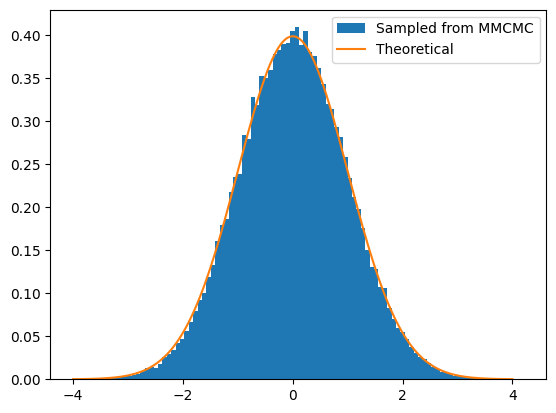

In [10]:
places = ForwardDiffusionv2(0, 100000, 1)
plt.hist(places[1000:], bins=100, density=True, label="Sampled from MMCMC")
x = np.linspace(-4, 4, 500)
plt.plot(x, P(x), label= "Theoretical")
plt.legend()

In [11]:
def ForwardDiffusionv2_2(x_0, steps, delta):
    places = []
    current = x_0
    for i in tqdm(range(steps)):
        F = - 2 *current 
        x_n = current + F * delta / 2 + np.random.normal(0, np.sqrt(delta))
        A = np.exp(delta*(current - x_n)*((-current) + (-x_n)) + ((delta/2)**2)*(current**2 - x_n**2))
        if (np.random.uniform() < A):
            places.append(x_n)
    return places

100%|██████████| 100000/100000 [00:00<00:00, 320496.62it/s]


1.0


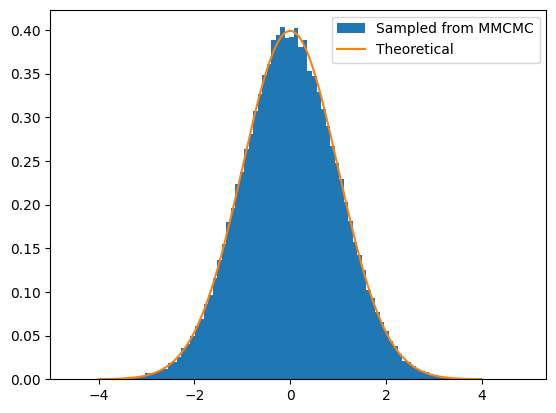

In [12]:
places = ForwardDiffusionv2_2(0, 100000, 1)
plt.hist(places[1000:], bins=100, density=True, label="Sampled from MMCMC")
x = np.linspace(-4, 4, 500)
plt.plot(x, P(x), label= "Theoretical")
plt.legend()
print(len(places) / 100000)

In [13]:
beta = np.linspace(0.0001, 0.05, 200,dtype=np.float32)

In [14]:
def ForwardDiffusionv3_1(x_0, steps, beta_t):
    places = []
    current = x_0
    for i in tqdm(range(steps)):
        # F = - 2 *current 
        x_n = current * np.sqrt(1 - beta_t[i]) + np.sqrt(beta_t[i]) * np.random.normal(0, 1)
        places.append(x_n)
        current = x_n
        # A = np.exp(delta*(current - x_n)*((-current) + (-x_n)) + ((delta/2)**2)*(current**2 - x_n**2))
        # if (np.random.uniform() < A):
            # places.append(x_n)
    return places
        
    
def ForwardDiffusionv3_2(x_0, steps, beta_t):
    current = x_0
    for i in (range(steps)):
        x_n = current * np.sqrt(1 - beta_t[i]) + np.sqrt(beta_t[i]) * np.random.normal(0, 1)
        current = x_n
    return current

100%|██████████| 200/200 [00:00<00:00, 191915.08it/s]


Text(0.5, 1.0, '5 runs of forward diffusion')

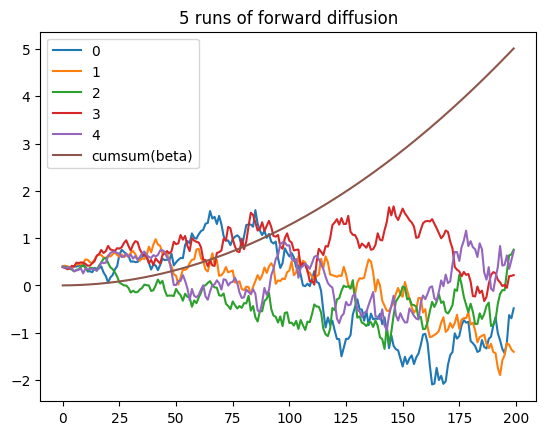

In [15]:
for i in range(5):
    places = ForwardDiffusionv3_1(0.4, 200, beta)
    plt.plot(places, label=f"{i}")
plt.plot(np.cumsum(beta), label="cumsum(beta)")
plt.legend()
plt.title("5 runs of forward diffusion")


In [16]:
ends = []
for i in tqdm(range(10000)):
    ends.append(ForwardDiffusionv3_2(0.4, 200, beta))

100%|██████████| 10000/10000 [00:06<00:00, 1560.19it/s]


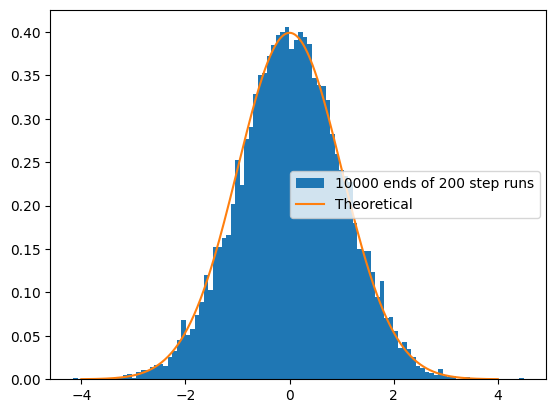

In [17]:
plt.hist(ends, bins=100, density=True, label="10000 ends of 200 step runs")
plt.plot(x, P(x), label= "Theoretical")
plt.legend()

In [35]:
def ForwardDiffusionFast(x_0, steps, alpha_bar):
    return np.sqrt(alpha_bar[steps]) * x_0 + np.sqrt(1 - alpha_bar[steps]) * np.random.normal(0, 1)

def ForwardDiffusionFast2(x_0, steps, alpha_bar):
    N = np.random.normal(0, 1)
    return (np.sqrt(alpha_bar[steps]) * x_0 + np.sqrt(1 - alpha_bar[steps]) * N, N)

In [19]:
alpha = [1 - b for b in beta]
alpha_bar = [np.prod(alpha[:i]) for i in range(len(alpha))]
print(alpha_bar)

[1.0, 0.9999000000025262, 0.9995492813011739, 0.9989480448631651, 0.9980966800831516, 0.9969957644391757, 0.9956460626150935, 0.9940485260275144, 0.9922042912481667, 0.9901146790077385, 0.987781192621055, 0.9852055159551976, 0.9823895115213086, 0.9793352180015046, 0.9760448484757535, 0.9725207870598147, 0.968765586254452, 0.9647819638617202, 0.9605727994789599, 0.9561411319248708, 0.9514901540063256, 0.9466232100286555, 0.9415437917718434, 0.9362555329830473, 0.9307622063683705, 0.9250677190883404, 0.919176106814594, 0.9130915306937385, 0.9068182707145657, 0.9003607219777219, 0.8937233895427179, 0.8869108819205197, 0.8799279074172806, 0.8727792670366618, 0.8654698502264234, 0.8580046288838836, 0.8503886517198718, 0.8426270393627353, 0.8347249762367819, 0.8266877072022242, 0.8185205309589711, 0.8102287942405462, 0.8018178867553595, 0.7932932330953693, 0.7846602892298155, 0.7759245359526334, 0.7670914731274281, 0.7581666146826915, 0.749155480776645, 0.7400635943508485, 0.7308964748362824

100%|██████████| 100000/100000 [00:00<00:00, 602835.16it/s]


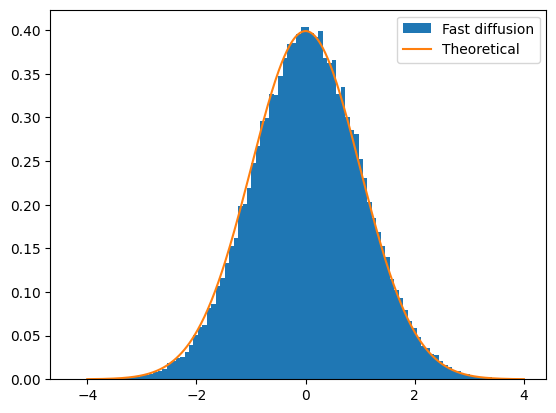

In [20]:
ends = []
for i in tqdm(range(100000)):
    ends.append(ForwardDiffusionFast(0.4, 199, alpha_bar))
plt.hist(ends, bins=100, density=True, label="Fast diffusion")
plt.plot(x, P(x), label= "Theoretical")
plt.legend()

# Undiffusion

In [21]:
# saving for when I mess all this up
beta = np.linspace(0.0001, 0.05, 200,dtype=np.float32)
alpha = [1 - b for b in beta]
alpha_bar = [np.prod(alpha[:i]) for i in range(len(alpha))]

# def undiffuse(x_t, t):
#     s_t = (1 - alpha[t]) / np.sqrt(1 - alpha_bar[t])
#     Beta_squiggle = (1 - alpha_bar[t-1]) * beta[t] / (1 - alpha[t])
#     nom = np.sqrt(Beta_squiggle) * np.random.normal(0, 1)
#     if (t == 0):
#         nom = 0
#     return (1 / np.sqrt(alpha[t])) * (x_t - s_t * GuessZ(x_t, t)) + nom



def GuessZ(x_t, alphaBar_t, x0=0.4):
    return (1/np.sqrt(1-alphaBar_t)) * (x_t-np.sqrt(alphaBar_t) * x0)

def SamplePInit():
    return 0.4

a = [1 - b for b in beta]
alphaBar_ts = [np.prod(a[:i]) for i in range(len(a))]

def RunUndiffuse(start_t, final_t, x_t, guess_function):
    timestep = start_t
    x_ns = [np.copy(x_t)]
    while timestep != final_t:
        t = timestep
        
        alphaBar_t = alphaBar_ts[timestep]
        s_t = (1 - a[timestep-1]) / np.sqrt(1 - alphaBar_t)
        if timestep == final_t+1:
            # print(s_t * guess_function(x_t, t) * (1 / np.sqrt(alpha[timestep])))
            # print(0.4 - x_t)
            # print((s_t * guess_function(x_t, t) * (1 / np.sqrt(alpha[timestep])))/(0.4 - x_t))
            nom = 0
        else:
            Beta_squiggle = (1 - alphaBar_ts[timestep-1]) * beta[t] / (1 - alphaBar_t)
            nom = np.sqrt(Beta_squiggle) * np.random.normal(0, 1)
        x_ns.append((1 / np.sqrt(alpha[timestep-1])) * (x_ns[-1] - s_t * guess_function(x_ns[-1], alphaBar_t)) + nom)
        # x_ns.append(undiffuse(x_ns[-1], timestep))
        timestep -= 1
    return x_ns

In [22]:
# # def undiffuse(x_t, t):
# #     s_t = (1 - alpha[t]) / np.sqrt(1 - alpha_bar[t])
# #     Beta_squiggle = (1 - alpha_bar[t-1]) * beta[t] / (1 - alpha[t])
# #     nom = np.sqrt(Beta_squiggle) * np.random.normal(0, 1)
# #     if (t == 0):
# #         nom = 0
# #     return (1 / np.sqrt(alpha[t])) * (x_t - s_t * GuessZ(x_t, t)) + nom
# beta = np.linspace(0.0001, 0.05, 200,dtype=np.float32)
# alpha = [1 - b for b in beta]
# alpha_bar = [np.prod(alpha[:i]) for i in range(len(alpha))]

# def GuessZ(x_t, t, x0=0.4):
#     return (1/np.sqrt(1-alpha_bar[t])) * (x_t-(np.sqrt(alpha_bar[t]) * x0))
# print(GuessZ(0.39, 2))

# def SamplePInit():
#     return 0.4

# def RunUndiffuse(start_t, final_t, x_t, guess_function):
#     timestep = start_t
#     x_ns = [np.copy(x_t)]
#     while timestep != final_t:
#         x_t = x_ns[-1]
#         t = timestep
#         s_t = (1 - alpha[t]) / np.sqrt(1 - alpha_bar[t])
#         if timestep == final_t+1:
#             nom = 0
#         else:
#             Beta_squiggle = (1 - alpha_bar[t-1]) * beta[t] / (1 - alpha_bar[t])
#             nom = np.sqrt(Beta_squiggle) * np.random.normal(0, 1)
#         x_ns.append((1 / np.sqrt(alpha[timestep])) * (x_t - s_t * guess_function(x_t, t)) + nom)
#         # x_ns.append(undiffuse(x_ns[-1], timestep))
#         timestep -= 1
#     return x_ns

In [23]:
n = 50
a = [1-b for b in beta]
a_T = np.prod(a[:n])
print(a_T)
print(alpha_bar[n])
print(RunUndiffuse(199, 00, np.random.uniform(0, 10), GuessZ))

0.7308964748362824
0.7308964748362824
[array(3.63623325), 3.814852106225628, 3.5637682423293824, 3.650479219678711, 3.4529517937350684, 3.6086270764881876, 3.5134571447946974, 3.4633573933284234, 3.377374791991133, 3.1021517963289136, 3.3099630844375665, 3.350609673007687, 3.6912858975525094, 3.4995173285991616, 3.2921761603076813, 3.367333850052074, 3.3342240741147955, 3.152524037222325, 2.998969925378992, 2.6506016147733003, 2.7237439083301482, 2.8475243318228936, 2.8584350020774663, 2.6683071688502307, 2.5570002139798493, 2.7374546126956347, 2.9973167163516075, 2.7353291927266157, 2.7199129313439903, 2.4800041897028655, 1.99667957923259, 1.4548638323161427, 1.5690181305795705, 1.5341017808897666, 1.6614792615637177, 1.7757413605565728, 1.892339197163116, 2.1267429295750953, 2.0651556442352668, 1.8066177051605372, 1.8016258899266637, 1.8214350787877651, 1.7510539628076693, 1.783002412690485, 1.649383427560955, 1.8002188251552453, 1.8048279721598512, 1.9470990186697292, 2.141518552971

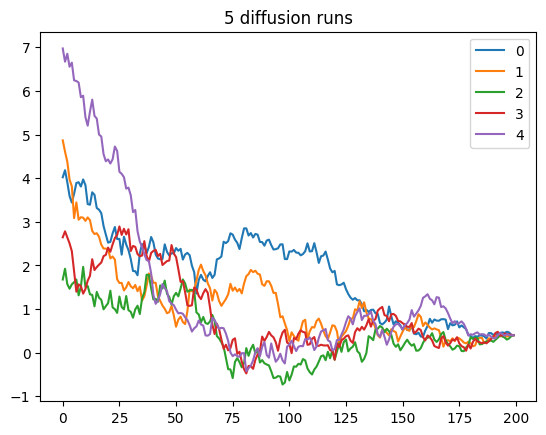

In [24]:
for i in range(5):
    plt.plot(RunUndiffuse(199, 00, np.random.uniform(0, 10), GuessZ), label=f"{i}")
plt.title("5 diffusion runs")
plt.legend()

In [25]:
out = []
for i in tqdm(range(1000)):
    out.append(RunUndiffuse(199, 00, 0.4, GuessZ)[-1])

100%|██████████| 1000/1000 [00:00<00:00, 1469.57it/s]


Text(0.5, 1.0, 'Histogram of 1000 runs of undiffusion')

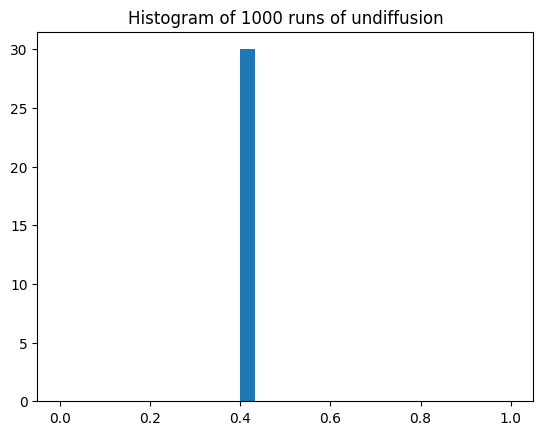

In [26]:
plt.hist(out, density=True, bins=30, range=[0, 1])
plt.title("Histogram of 1000 runs of undiffusion")

In [27]:
ffd = []
ud = []
for i in tqdm(range(10000)):
    ffd.append(ForwardDiffusionFast(0.4, 125, alpha_bar))
    ud.append(RunUndiffuse(199, 125, 0, GuessZ)[-1])

100%|██████████| 10000/10000 [00:02<00:00, 3915.31it/s]


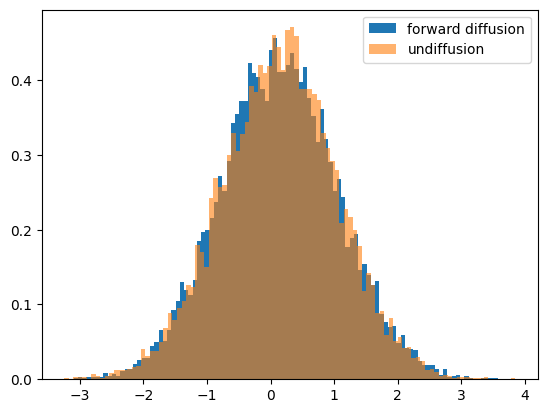

In [28]:
plt.hist(ffd, label="forward diffusion", bins = 100, density=True)
plt.hist(ud, label="undiffusion", alpha=0.6, bins=100, density=True)
plt.legend()

In [37]:
def NewGuessZ(x_t, alphaBar_t):
    za = (1/np.sqrt(1-alphaBar_t))*(x_t - np.sqrt(alphaBar_t)*0.4)
    zb = (1/np.sqrt(1-alphaBar_t))*(x_t - np.sqrt(alphaBar_t)*-0.6)
    ea = np.exp(-(za**2)/2)
    eb = np.exp(-(zb**2)/2)
    return (0.8 * za * ea + 0.2 * zb * eb) / (0.8 * ea + 0.2 * eb)

def SamplePInit():
    x_inits = [0.4, -0.6]
    return np.random.choice(x_inits, p=[0.8, 0.2])


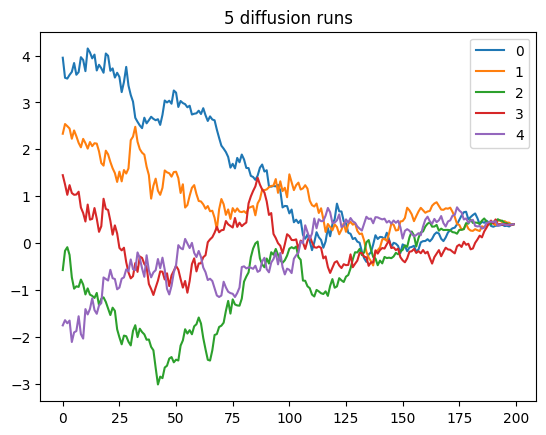

In [30]:
for i in range(5):
    plt.plot(RunUndiffuse(199, 00, np.random.uniform(-3, 5), NewGuessZ), label=f"{i}")
plt.title("5 diffusion runs")
plt.legend()

100%|██████████| 1000/1000 [00:01<00:00, 876.24it/s]


Text(0.5, 1.0, 'Histogram of 1000 runs of undiffusion')

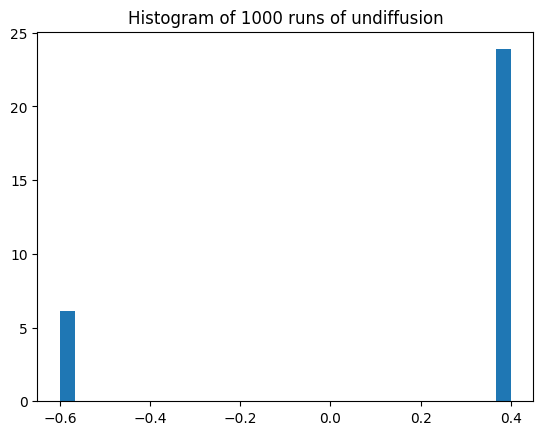

In [31]:
out = []
for i in tqdm(range(1000)):
    out.append(RunUndiffuse(199, 00, 0.4, NewGuessZ)[-1])
plt.hist(out, density=True, bins=30)
plt.title("Histogram of 1000 runs of undiffusion")

  0%|          | 0/10 [00:00<?, ?it/s]C:\Users\ajwef\AppData\Local\Temp\ipykernel_26180\3741855527.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  za = (1/np.sqrt(1-alphaBar_t))*(x_t - np.sqrt(alphaBar_t)*0.4)
C:\Users\ajwef\AppData\Local\Temp\ipykernel_26180\3741855527.py:2: RuntimeWarning: invalid value encountered in scalar multiply
  za = (1/np.sqrt(1-alphaBar_t))*(x_t - np.sqrt(alphaBar_t)*0.4)
C:\Users\ajwef\AppData\Local\Temp\ipykernel_26180\3741855527.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  zb = (1/np.sqrt(1-alphaBar_t))*(x_t - np.sqrt(alphaBar_t)*-0.6)
C:\Users\ajwef\AppData\Local\Temp\ipykernel_26180\3741855527.py:6: RuntimeWarning: invalid value encountered in scalar multiply
  return (0.8 * za * ea + 0.2 * zb * eb) / (0.8 * ea + 0.2 * eb)
C:\Users\ajwef\AppData\Local\Temp\ipykernel_26180\3741855527.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return (0.8 * za * ea + 0.2 * zb * eb) / (0.8 * ea + 0.2 * eb)


Text(0.5, 1.0, 'Guesses vs time')

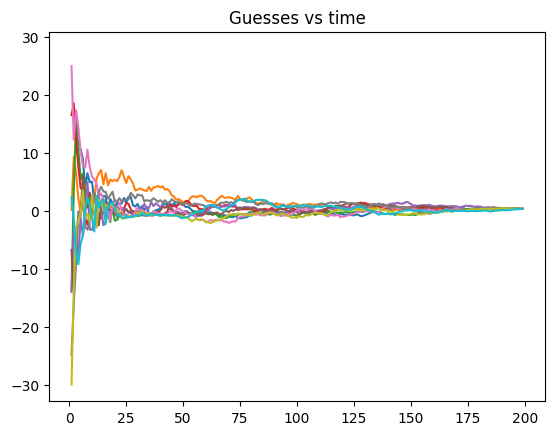

In [32]:
all_guesses = []
for i in tqdm(range(10)):
    values = RunUndiffuse(199, 0, 0.4, NewGuessZ)
    guesses = [NewGuessZ(values[j], alphaBar_ts[j]) for j in range(len(values))]
    all_guesses.append(guesses)
for i in all_guesses:
    plt.plot(i)
plt.title("Guesses vs time")
# print(all_guesses)
# plt.plot(all_guesses)

In [33]:
import torch
import torchvision
from torch import nn

n_input, n_hidden, n_out = 2, 15, 1
net = nn.Sequential(nn.Linear(n_input, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, n_out),
                      )
net(torch.tensor([3.0,4]))

tensor([0.4007], grad_fn=<ViewBackward0>)

In [44]:
loss_fn = nn.MSELoss()
opt = torch.optim.Adam(net.parameters(), lr=1e-3) 
loss_out = []
for step in tqdm(range(0,200000)):
  opt.zero_grad()
  x0= SamplePInit()
  # Choose a random time t
  t = np.random.randint(0, 200)
  noisyData, noise = ForwardDiffusionFast2(x0, t, alpha_bar=alpha_bar)
  # call your FowardDiffusionFast (make sure you return the noisyData and the noise)
  noisyData=torch.tensor([noisyData,t]).float() # include the time for the data
  noise=torch.tensor([noise]) #make it so pytorch reads the noise

  loss=loss_fn(noise,net(noisyData))
  loss.backward()
  loss_out.append(loss.item())
  opt.step()  

100%|██████████| 200000/200000 [01:59<00:00, 1669.54it/s]


In [47]:
def rolling_avg(arr, window):
    to_return = []
    for i in range(len(arr)):
        lower = int(i-window/2)
        upper = int(i+window/2)
        if lower < 0: lower = 0
        if upper >= len(arr): upper = len(arr)-1
        to_return.append(sum(arr[lower:upper])/(upper-lower))          
    return to_return

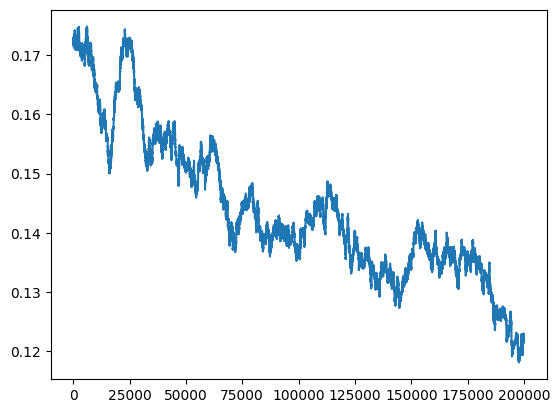

In [52]:
plt.plot((rolling_avg(loss_out, 10000)))

In [109]:
torch.set_default_dtype(torch.double)
def RunUndiffuseTorch(start_t, final_t, x_t):
    timestep = start_t
    x_ns = [np.copy(x_t)]
    while timestep != final_t:
        t = timestep
        
        alphaBar_t = alphaBar_ts[timestep]
        s_t = (1 - a[timestep-1]) / np.sqrt(1 - alphaBar_t)
        if timestep == final_t+1:
            # print(s_t * guess_function(x_t, t) * (1 / np.sqrt(alpha[timestep])))
            # print(0.4 - x_t)
            # print((s_t * guess_function(x_t, t) * (1 / np.sqrt(alpha[timestep])))/(0.4 - x_t))
            nom = 0
        else:
            Beta_squiggle = (1 - alphaBar_ts[timestep-1]) * beta[t] / (1 - alphaBar_t)
            nom = np.sqrt(Beta_squiggle) * np.random.normal(0, 1)
        x_ns.append((1 / np.sqrt(alpha[timestep-1])) * (x_ns[-1] - s_t * net(torch.tensor([np.float32(x_ns[-1]), np.float32(alphaBar_t)])).detach().numpy()[0]) + nom)
        # x_ns.append(undiffuse(x_ns[-1], timestep))
        timestep -= 1
    return x_ns


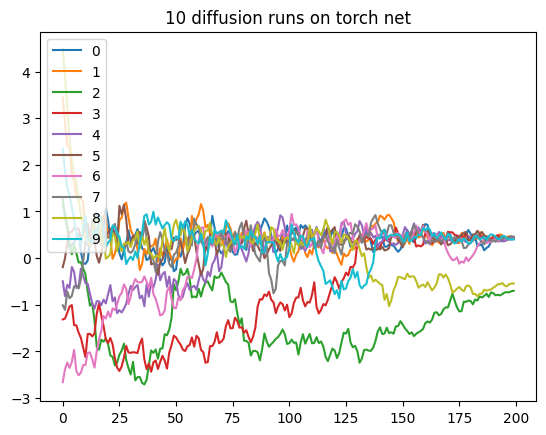

In [101]:
for i in range(10):
    plt.plot(RunUndiffuseTorch(199, 00, np.random.uniform(-3, 5)), label=f"{i}")
plt.title("10 diffusion runs on torch net")
plt.legend()

In [102]:
out = []
for i in tqdm(range(1000)):
    out.append(RunUndiffuseTorch(199, 00, 0.4)[-1])


100%|██████████| 1000/1000 [00:12<00:00, 77.82it/s]


Text(0.5, 1.0, 'Histogram of 1000 runs of undiffusion with torch')

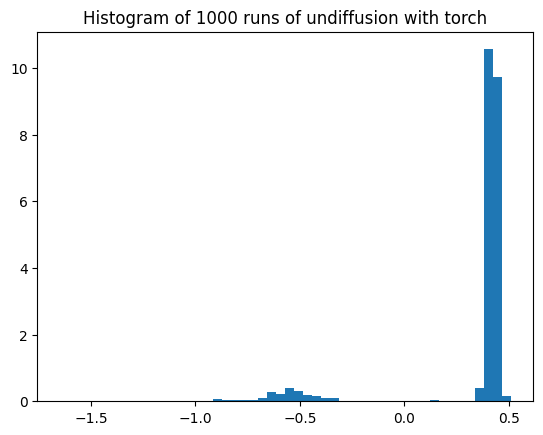

In [103]:
plt.hist(out, density=True, bins=50)
plt.title("Histogram of 1000 runs of undiffusion with torch")

100%|██████████| 10/10 [00:00<00:00, 46.83it/s]


Text(0.5, 1.0, 'Guesses vs time (torch)')

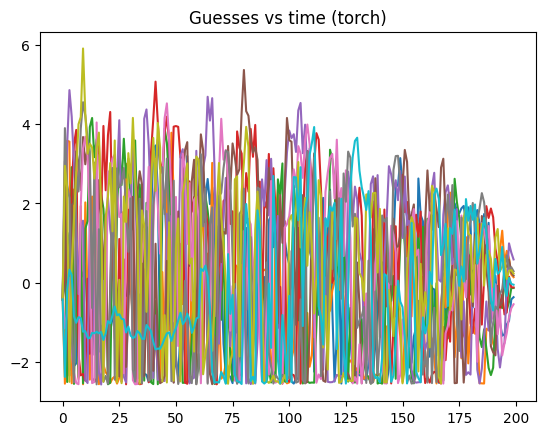

In [104]:
all_guesses = []
for i in tqdm(range(10)):
    values = RunUndiffuseTorch(199, 0, 0.4)
    
    guesses = [net(torch.tensor([np.float32(values[j]), np.float32(alphaBar_ts[j])])).detach().numpy()[0] for j in range(len(values))]
    all_guesses.append(guesses)
for i in all_guesses:
    plt.plot(i)
plt.title("Guesses vs time (torch)")

In [112]:
n_input, n_hidden, n_out = 3, 15, 1
net2 = nn.Sequential(nn.Linear(n_input, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, n_out),
                      )


In [154]:

loss_fn = nn.MSELoss()
opt = torch.optim.Adam(net2.parameters(), lr=1e-3) 
loss_out = []
for step in tqdm(range(0,200000)):
  opt.zero_grad()
  x0= SamplePInit()
  # Choose a random time t
  t = np.random.randint(0, 200)
  noisyData, noise = ForwardDiffusionFast2(x0, t, alpha_bar=alpha_bar)
  # call your FowardDiffusionFast (make sure you return the noisyData and the noise)
  if (x0 < 0):
      prompt = -1
  else:
      prompt = 1
  noisyData=torch.tensor([noisyData,t, prompt]).double() # include the time for the data
  noise=torch.tensor([noise]).double() #make it so pytorch reads the noise

  loss=loss_fn(noise,net2(noisyData))
  loss.backward()
  loss_out.append(loss.item())
  opt.step()  

100%|██████████| 200000/200000 [01:54<00:00, 1742.53it/s]


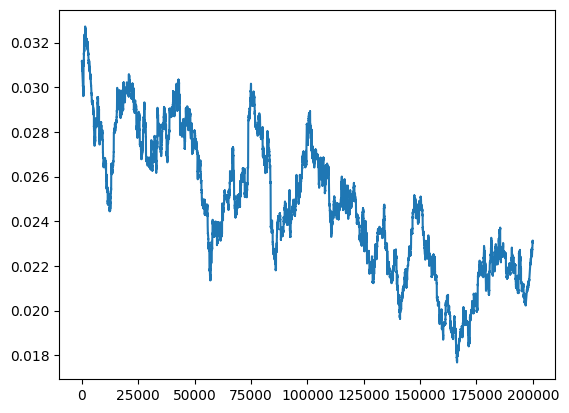

In [155]:
plt.plot((rolling_avg(loss_out, 10000)))

In [166]:
torch.set_default_dtype(torch.double)

def RunUndiffuseTorchPrompt(start_t, final_t, x_t, prompt):
    timestep = start_t
    x_ns = [np.copy(x_t)]
    while timestep != final_t:
        t = timestep
        
        alphaBar_t = alphaBar_ts[timestep]
        s_t = (1 - a[timestep-1]) / np.sqrt(1 - alphaBar_t)
        if timestep == final_t+1:
            # print(s_t * guess_function(x_t, t) * (1 / np.sqrt(alpha[timestep])))
            # print(0.4 - x_t)
            # print((s_t * guess_function(x_t, t) * (1 / np.sqrt(alpha[timestep])))/(0.4 - x_t))
            nom = 0
        else:
            Beta_squiggle = (1 - alphaBar_ts[timestep-1]) * beta[t] / (1 - alphaBar_t)
            nom = np.sqrt(Beta_squiggle) * np.random.normal(0, 1)
        x_ns.append((1 / np.sqrt(alpha[timestep-1])) * (x_ns[-1] - s_t * net2(torch.tensor([np.float32(x_ns[-1]), np.float32(alphaBar_t), np.float32(prompt)]).double()).detach().numpy()[0]) + nom)
        # x_ns.append(undiffuse(x_ns[-1], timestep))
        timestep -= 1
    return x_ns

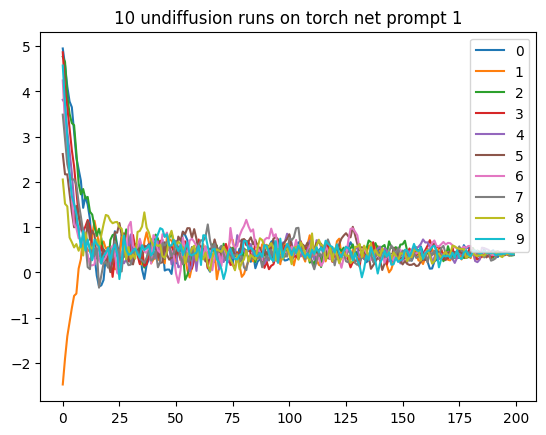

In [180]:
for i in range(10):
    plt.plot(RunUndiffuseTorchPrompt(199, 00, np.random.uniform(-3, 5), 1), label=f"{i}")
plt.title("10 undiffusion runs on torch net prompt 1")
plt.legend()

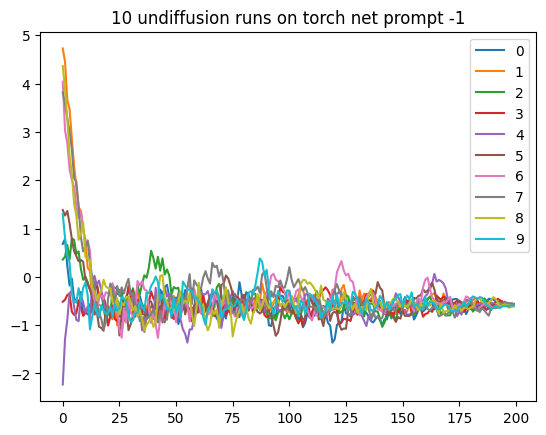

In [168]:
for i in range(10):
    plt.plot(RunUndiffuseTorchPrompt(199, 00, np.random.uniform(-3, 5), -1), label=f"{i}")
plt.title("10 undiffusion runs on torch net prompt -1")
plt.legend()

100%|██████████| 1000/1000 [00:12<00:00, 82.96it/s]


Text(0.5, 1.0, 'Histogram of 1000 runs of undiffusion with torch prompt 1')

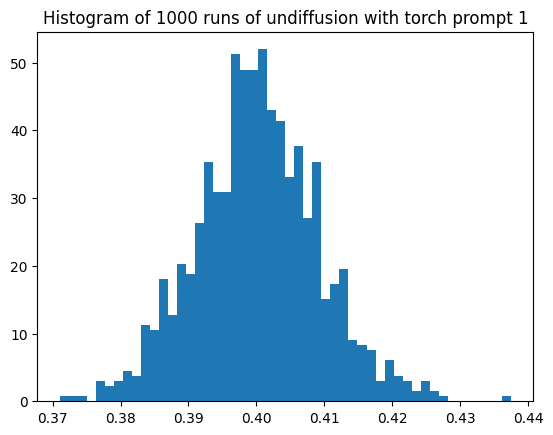

In [169]:
out = []
for i in tqdm(range(1000)):
    out.append(RunUndiffuseTorchPrompt(199, 00, 0.4, 1)[-1])
plt.hist(out, density=True, bins=50)
plt.title("Histogram of 1000 runs of undiffusion with torch prompt 1")

100%|██████████| 1000/1000 [00:12<00:00, 81.95it/s]


Text(0.5, 1.0, 'Histogram of 1000 runs of undiffusion with torch prompt -1')

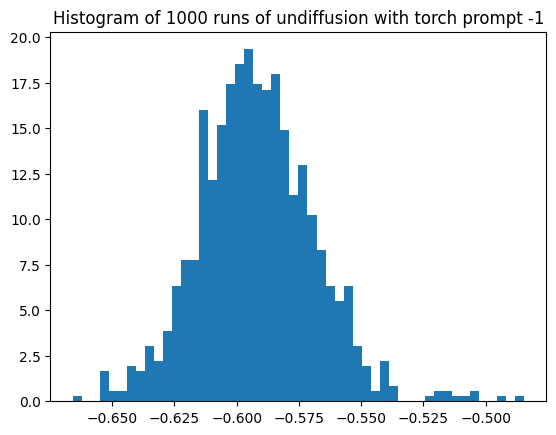

In [170]:
out = []
for i in tqdm(range(1000)):
    out.append(RunUndiffuseTorchPrompt(199, 00, 0.4, -1)[-1])
plt.hist(out, density=True, bins=50)
plt.title("Histogram of 1000 runs of undiffusion with torch prompt -1")

100%|██████████| 10/10 [00:00<00:00, 41.60it/s]


Text(0.5, 1.0, 'Guesses vs time (torch) prompt 1')

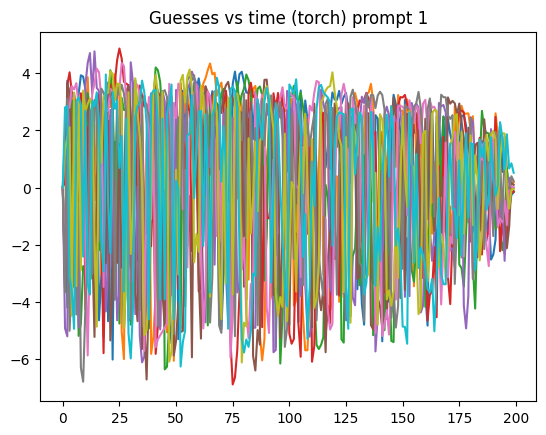

In [178]:
all_guesses = []
for i in tqdm(range(10)):
    values = RunUndiffuseTorchPrompt(199, 0, 0.4, 1)
    
    guesses = [net2(torch.tensor([np.float32(values[j]), np.float32(alphaBar_ts[j]), 1]).double()).detach().numpy()[0] for j in range(len(values))]
    all_guesses.append(guesses)
for i in all_guesses:
    plt.plot(i)
plt.title("Guesses vs time (torch) prompt 1")

100%|██████████| 10/10 [00:00<00:00, 42.84it/s]


Text(0.5, 1.0, 'Guesses vs time (torch) prompt -1')

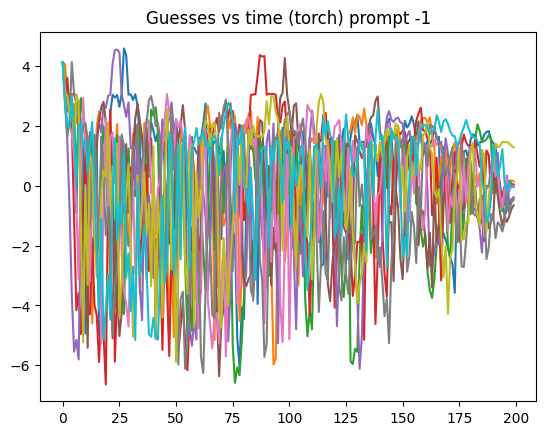

In [179]:
all_guesses = []
for i in tqdm(range(10)):
    values = RunUndiffuseTorchPrompt(199, 0, 0.4, -1)
    
    guesses = [net2(torch.tensor([np.float32(values[j]), np.float32(alphaBar_ts[j]), -1]).double()).detach().numpy()[0] for j in range(len(values))]
    all_guesses.append(guesses)
for i in all_guesses:
    plt.plot(i)
plt.title("Guesses vs time (torch) prompt -1")